In [1]:
import os
import csv
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr as pearr

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils as utils
import torch.nn.init as init

In [22]:
'''
@@@UTMOST에서 사용가능한 환자들(sample) 확인@@@
'''
# ob1 = open('../UTMOST_pred_result_data/tiss_R/tissuewise/Liver_observed_data.txt').readlines()
# ob1_list = ob1[0].split()
# print(len(ob1_list))

ob = open('../UTMOST_pred_result_data/tiss_R/tissuewise/Liver_observed_data.txt').readlines()
ob_list = ob[0].split()

pre = open('../UTMOST_pred_result_data/predicted_Liver.txt').readlines()
pre_list = pre[0].split()

print('observed sample # :', len(ob_list), ' / ', 'predicted sample # :', len(pre_list))

# count = 0
# ob_idx = []       ###  column
# pre_idx = []      ###  column
# ref_sample = []   ###  patient name
# for k1 in range(1, len(ob_list)):
#     if ob_list[k1][9]=='-':
#         ref = ob_list[k1][:9]
#     else:
#         ref = ob_list[k1][:10]
        
#     for k2 in range(len(pre_list)):
#         pred = pre_list[k2]
#         if ref==pred:
#             count += 1
# #             print(ref, pred, '//', k1, k2)
#             ob_idx.append(k1)
#             pre_idx.append(k2)
#             ref_sample.append(ref)

# print('(UTMOST) overlaped between observed and predicted sample # :', len(ref_sample))
# print(ref_sample)

observed sample # : 189  /  predicted sample # : 867


In [26]:
tiss_list = os.listdir('../UTMOST_pred_result_data/tiss_R/tissuewise/')
for k in range(len(tiss_list)):
    ob = open('../UTMOST_pred_result_data/tiss_R/tissuewise/'+tiss_list[k]).readlines()
    ob_list = ob[0].split()
    print(len(ob_list))

353
521
461
159
364
286
307
147
155
135
189
139
255
206
139
273
144
465
486
281
103
315
409
8
264
170
395
12
444
626
137
192
162
118
178
491
105
311
362
139
445
183
475
6
125
194
177
51
96
136
146
265
109
7


In [12]:
a = open('Sample_Names_by_Tissue_by_Patient.csv')
reader = csv.reader(a)

count = 0
for plink_sample in reader:
    count += 1
    if count==1:
        break
        
print(len(ref_sample), len(ob_idx), len(pre_idx), len(plink_sample))
print(plink_sample)
# sorted_sample = []

# sorted_idx_plink = []
# sorted_idx_ob = []
# sorted_idx_pre = []

# for k1 in range(len(ref_sample)):
#     dref_sample = ref_sample[k1]
#     for k2 in range(1, len(plink_sample)):
#         dplink_sample = plink_sample[k2]
        
#         if dref_sample==dplink_sample:
#             sorted_sample.append(dref_sample)
            
#             sorted_idx_plink.append(k2)
#             sorted_idx_ob.append(ob_idx[k1])
#             sorted_idx_pre.append(pre_idx[k1])
            
# print('sorted sample # :', len(sorted_sample))
# print('snp data sample index # :', len(sorted_idx_plink))
# np.save('sorted_sample_idx.npy', sorted_idx_plink)

184 184 184 621
['', 'GTEX-15ER7', 'GTEX-12WSD', 'GTEX-ZAB4', 'GTEX-13OW6', 'GTEX-131YS', 'GTEX-YFC4', 'GTEX-14C5O', 'GTEX-11GSP', 'GTEX-12ZZX', 'GTEX-13OVJ', 'GTEX-13OW8', 'GTEX-14DAQ', 'GTEX-WY7C', 'GTEX-ZUA1', 'GTEX-1313W', 'GTEX-14PJM', 'GTEX-T5JC', 'GTEX-T6MN', 'GTEX-11DXX', 'GTEX-11TT1', 'GTEX-13RTJ', 'GTEX-NPJ8', 'GTEX-WZTO', 'GTEX-Y114', 'GTEX-Y3IK', 'GTEX-13NYB', 'GTEX-13O3O', 'GTEX-13OVL', 'GTEX-13PVQ', 'GTEX-14BIN', 'GTEX-14BMV', 'GTEX-14C39', 'GTEX-15DYW', 'GTEX-RU72', 'GTEX-TSE9', 'GTEX-WYVS', 'GTEX-11EQ9', 'GTEX-12BJ1', 'GTEX-14E7W', 'GTEX-15CHQ', 'GTEX-17EVP', 'GTEX-Q2AG', 'GTEX-U3ZN', 'GTEX-XV7Q', 'GTEX-YEC4', 'GTEX-ZDXO', 'GTEX-111YS', 'GTEX-11P7K', 'GTEX-1211K', 'GTEX-131XG', 'GTEX-13D11', 'GTEX-13FHO', 'GTEX-13G51', 'GTEX-13O3Q', 'GTEX-13O61', 'GTEX-13VXU', 'GTEX-13X6J', 'GTEX-13X6K', 'GTEX-16XZZ', 'GTEX-17EVQ', 'GTEX-17HII', 'GTEX-QDT8', 'GTEX-WFON', 'GTEX-WHSE', 'GTEX-WYJK', 'GTEX-Y3I4', 'GTEX-ZDYS', 'GTEX-ZVT2', 'GTEX-1122O', 'GTEX-117YX', 'GTEX-11EM3', 'GTEX-11I7

In [4]:
gene_ob_list = []
gene_pre_list = []

for k1 in range(len(ob)):
    g1 = ob[k1].split()[0]
    gene_ob_list.append(g1)

for k2 in range(len(pre)):
    g2 = pre[k2].split()[0]
    gene_pre_list.append(g2)

print('# of genes for observed / predicted :', len(gene_ob_list), ' / ', len(gene_pre_list))

gene_ob_idx = []
gene_pre_idx = []
gene_list = []
for k1 in range(len(gene_ob_list)):
    dgene_ob = gene_ob_list[k1]
    if k1%5000==0:
        print(k1)
        
    for k2 in range(len(gene_pre_list)):
        dgene_pre = gene_pre_list[k2]
        if dgene_ob==dgene_pre: 
            gene_ob_idx.append(k1)
            gene_pre_idx.append(k2)
            gene_list.append(dgene_ob)
            
print(len(gene_ob_idx), len(gene_pre_idx), len(gene_list))

# of genes for observed / predicted : 57820  /  10165
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
10145 10145 10145


/opt/anaconda3/envs/khj/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in float_scalars
  r = r_num / r_den


9916 9916


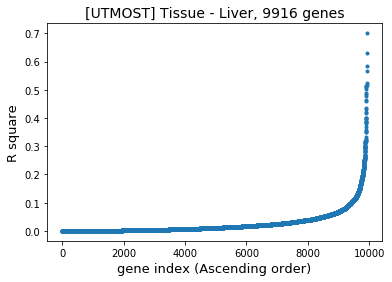

In [5]:
### check R square for all avaiilable gene
sorted_r_list = []
sorted_gene_list = []
sorted_gene_idx = []
for i in range(len(gene_list)):    
    aa = np.float32(np.array(ob[gene_ob_idx[i]].split())[sorted_idx_ob])
    bb = np.float32(np.array(pre[gene_pre_idx[i]].split())[sorted_idx_pre])
    if (np.sum(aa)*0 != 0) or (np.sum(bb)*0 != 0):
        continue
        
    r, p = pearr(aa, bb)
    if (r**2)*0!=0:
#         plt.plot(bb, aa,'*')
#         plt.title('R squre : %.4f / p %.4f'%(r**2, p))
#         plt.show()
        continue
    
    sorted_r_list.append(r**2)
    sorted_gene_list.append(gene_list[i])
    sorted_gene_idx.append(i)
        
print(len(sorted_r_list), len(sorted_gene_list))
plt.title('[UTMOST] Tissue - Liver, %d genes'%len(sorted_r_list),fontsize=14)
plt.plot(np.array(sorted_r_list)[np.argsort(sorted_r_list)], '.')
plt.xlabel('gene index (Ascending order)', fontsize=13)
plt.ylabel('R square', fontsize=13)
plt.savefig('img/UTMOST_allgene_Rsqr.png')
plt.show()

In [6]:
#### top 10 sorting code ##########

sorted_r_list = []
sorted_gene_list = []
sorted_gene_idx = []
for i in range(len(gene_list)):    
    aa = np.float32(np.array(ob[gene_ob_idx[i]].split())[sorted_idx_ob])
    bb = np.float32(np.array(pre[gene_pre_idx[i]].split())[sorted_idx_pre])
    if (np.sum(aa)*0 != 0) or (np.sum(bb)*0 != 0):
        continue
        
    r, p = pearr(aa, bb)
    if (r**2)*0!=0:
#         plt.plot(bb, aa,'*')
#         plt.title('R squre : %.4f / p %.4f'%(r**2, p))
#         plt.show()
        continue
    
    sorted_r_list.append(r**2)
    sorted_gene_list.append(gene_list[i])
    sorted_gene_idx.append(i)
    
#     if r**2>0.7:
#         plt.title('UTMOST - %s : %.5f'%(gene_list[i], r**2), fontsize=14)
#         plt.plot(bb, aa, 'r*')
#         plt.xlabel('Predicted expression', fontsize=13)
#         plt.ylabel('Observed expression', fontsize=13)
#         plt.savefig('img/Scatter_UTMOST_%s.png'%gene_list[i])
#         plt.show()
        
print(len(sorted_r_list), len(sorted_gene_list))

top_idx = np.argsort(sorted_r_list)[-10:]
top_r_list = np.array(sorted_r_list)[top_idx]
top_gene_list = np.array(sorted_gene_list)[top_idx]
for k in range(len(top_gene_list)):
    print(top_gene_list[k], ' = ', round(top_r_list[k], 4))
    
top_dict = dict(zip(top_gene_list, top_r_list))
print(top_dict)

json.dump(top_dict, open('top10_name2rsqr.json','w'))

9916 9916
PKN3  =  0.5024
THNSL2  =  0.5102
GSTT1  =  0.513
GSTT2  =  0.5132
DOPEY2  =  0.5159
XKR9  =  0.5257
C17orf97  =  0.5672
DDT  =  0.5834
PILRA  =  0.6287
FAM118A  =  0.7004
{'PKN3': 0.5023722014302621, 'THNSL2': 0.5102497471108478, 'GSTT1': 0.512989475717692, 'GSTT2': 0.5132431758329972, 'DOPEY2': 0.515921473961555, 'XKR9': 0.5257457796568623, 'C17orf97': 0.5672138929095496, 'DDT': 0.5833670780246827, 'PILRA': 0.6287449908122653, 'FAM118A': 0.700421157298706}


In [9]:
#### low 20 sorting code ##########

sorted_r_list = []
sorted_gene_list = []
sorted_gene_idx = []
for i in range(len(gene_list)):    
    aa = np.float32(np.array(ob[gene_ob_idx[i]].split())[sorted_idx_ob])
    bb = np.float32(np.array(pre[gene_pre_idx[i]].split())[sorted_idx_pre])
    if (np.sum(aa)*0 != 0) or (np.sum(bb)*0 != 0):
        continue
        
    r, p = pearr(aa, bb)
    if (r**2)*0!=0:
        continue

    sorted_r_list.append(r**2)
    sorted_gene_list.append(gene_list[i])
    sorted_gene_idx.append(i)
        
print(len(sorted_r_list), len(sorted_gene_list))

low_idx = np.argsort(sorted_r_list)[:200]
low_r_list = np.array(sorted_r_list)[low_idx]
low_gene_list = np.array(sorted_gene_list)[low_idx]
for k in range(len(low_gene_list)):
    print(low_gene_list[k])
    
low_dict = dict(zip(low_gene_list, low_r_list))
print(low_dict)

json.dump(low_dict, open('low200_name2rsqr.json','w'))

9916 9916
WDR83OS
ARFIP2
CDC42
PRR11
MON1B
HAND2
UBE2Z
MSANTD4
FAM3B
CPSF6
MRPL30
FN3K
RETSAT
PTMA
C5orf22
STK24
AGO4
C11orf86
HELQ
A1CF
RWDD1
ADRB2
BAIAP2L1
JMJD4
KPTN
ITGA9
WDR36
TJP2
SOCS2
OS9
RIOK1
FOLR2
DBF4
G0S2
SKIV2L2
C1orf172
MFSD12
FAHD2B
IFT43
CPSF2
MTA3
ATF4
PLEK2
SH3YL1
ACTR3
C11orf54
RAB2B
PWWP2A
SYT12
PMPCB
SMARCAD1
DYRK4
ATP13A4
CDAN1
PSEN2
CNPPD1
CENPJ
TRPV2
LAMC2
FSIP1
MIDN
TM9SF2
MAPKAPK3
C4orf27
ZNF544
OVGP1
DCAF17
GRASP
LOX
STK17A
SEC61A1
HNRNPU
HCN3
NOP10
VWA1
IFT88
CD38
SNAP25
ETV4
PDLIM2
MRPS30
CDC20
NPL
SATB1
CBWD2
CCDC146
TRIM68
JMJD1C
RBMS3
ZNF428
PTPN23
HARS
C17orf80
GPCPD1
SMCR8
CHML
ZBTB11
CLIP1
IL15
ZBTB10
CUEDC1
YY1AP1
PPP5C
PHC1
RELL2
SLCO4C1
KXD1
CYP2C9
TXNDC15
SSX2IP
SRSF5
SMARCC1
DUSP5
LYRM2
CMC1
PPFIBP1
PALM2
RERE
ARHGAP42
SULT1A2
THOC5
CST3
CUL7
DENND1A
CDK13
NEK8
KCNE4
TTF2
POLR2M
EFTUD2
TALDO1
SLC35G5
PPP6R3
RIC8A
TMEM55B
FBXO46
KCTD7
H2AFV
ATAD3A
CTDNEP1
MRPL43
BPGM
PDGFA
GORASP1
SEPP1
POLR3G
PCBP2
CDC34
ZNF562
TMEM88
DCAF10
SPRTN
SERINC5
CCDC47